In [ ]:
!unzip user-wallet-transactions.json

Archive:  user-wallet-transactions.json.zip
  inflating: user-wallet-transactions.json  
  inflating: __MACOSX/._user-wallet-transactions.json  


In [1]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

# Load JSON file
json_file = '/content/user-wallet-transactions.json'
data = pd.read_json(json_file)

# Convert to CSV
csv_file = 'data.csv'
data.to_csv(csv_file, index=False)

print(f"JSON data has been successfully converted to {csv_file}")


JSON data has been successfully converted to data.csv


In [104]:
df=pd.read_csv('/content/data.csv')

In [12]:
len(df)

100000

In [13]:
df.head()

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,2021-08-17 05:29:26,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'}
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,2021-05-20 15:36:53,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'}
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,2021-07-24 09:28:33,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'}
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,2021-07-31 23:15:18,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'}
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,2021-04-19 15:25:07,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'}


In [15]:
unique_ids=[]
for i in df['userWallet']:
  if i not in unique_ids:
    unique_ids.append(i)

In [16]:
len(unique_ids)

3497

In [72]:
df.columns

Index(['_id', 'userWallet', 'network', 'protocol', 'txHash', 'logId',
       'timestamp', 'blockNumber', 'action', 'actionData', '__v', 'createdAt',
       'updatedAt'],
      dtype='object')

In [74]:
columns_to_keep = ['userWallet', 'timestamp', 'action', 'actionData']
df_cleaned = df[columns_to_keep].copy()
df_cleaned.head()

,userWallet,timestamp,action,actionData
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,2021-08-17 05:29:26,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a..."
1,0x000000000051d07a4fb3bd10121a343d85818da6,2021-05-20 15:36:53,deposit,"{'type': 'Deposit', 'amount': '145000000000000..."
2,0x000000000096026fb41fc39f9875d164bd82e2dc,2021-07-24 09:28:33,deposit,"{'type': 'Deposit', 'amount': '100000000000000..."
3,0x000000000096026fb41fc39f9875d164bd82e2dc,2021-07-31 23:15:18,deposit,"{'type': 'Deposit', 'amount': '400000000000000..."
4,0x0000000000e189dd664b9ab08a33c4839953852c,2021-04-19 15:25:07,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548..."


In [97]:
df.dtypes

,0
_id,object
userWallet,object
network,object
protocol,object
txHash,object
logId,object
timestamp,object
blockNumber,int64
action,object
actionData,object


In [105]:
!unzip user-wallet-transactions.json


Archive:  user-wallet-transactions.json.zip
  inflating: user-wallet-transactions.json  
  inflating: __MACOSX/._user-wallet-transactions.json  


In [106]:
import pandas as pd

# Step 1: Load your dataset
# If it's from a JSON file:
with open('/content/user-wallet-transactions.json') as f:
  data = json.load(f)

# If it's already a Python list of dicts (like pasted):
# data = [...]

# Step 2: Expand and clean actionData
for item in data:
    ad = item.get('actionData', {})

    # Extract fields from actionData
    item['action_type'] = ad.get('type')
    item['asset'] = ad.get('assetSymbol')
    item['amount'] = float(ad.get('amount', 0))
    item['price_usd'] = float(ad.get('assetPriceUSD', 0))
    item['user_id'] = ad.get('userId')
    item['amount_usd'] = item['amount'] * item['price_usd'] / 1e6  # Assuming 6 decimals like USDC

    # Convert timestamp to datetime
    try:
        item['timestamp'] = pd.to_datetime(item['timestamp'], unit='s')
    except:
        pass

    # Convert createdAt and updatedAt from {$date: ...}
    try:
        item['createdAt'] = pd.to_datetime(item['createdAt']['$date'])
        item['updatedAt'] = pd.to_datetime(item['updatedAt']['$date'])
    except:
        pass

# Step 3: Create DataFrame
df = pd.DataFrame(data)

# Step 4: Drop unnecessary columns (optional)
cols_to_drop = ['_id', '__v', 'actionData', 'logId', 'protocol', 'network']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# Step 5: View final DataFrame
print(df[['userWallet', 'timestamp', 'action', 'action_type', 'asset', 'amount', 'price_usd', 'amount_usd']].head())


                                   userWallet           timestamp  \
0  0x00000000001accfa9cef68cf5371a23025b6d4b6 2021-08-17 05:29:26   
1  0x000000000051d07a4fb3bd10121a343d85818da6 2021-05-20 15:36:53   
2  0x000000000096026fb41fc39f9875d164bd82e2dc 2021-07-24 09:28:33   
3  0x000000000096026fb41fc39f9875d164bd82e2dc 2021-07-31 23:15:18   
4  0x0000000000e189dd664b9ab08a33c4839953852c 2021-04-19 15:25:07   

             action       action_type   asset        amount  price_usd  \
0           deposit           Deposit    USDC  2.000000e+09   0.993832   
1           deposit           Deposit  WMATIC  1.450000e+20   1.970307   
2           deposit           Deposit  WMATIC  1.000000e+15   0.922377   
3           deposit           Deposit  WMATIC  4.000000e+15   1.057483   
4  redeemunderlying  RedeemUnderlying    USDC  5.015480e+05   1.002130   

     amount_usd  
0  1.987664e+03  
1  2.856945e+14  
2  9.223773e+08  
3  4.229933e+09  
4  5.026161e-01  


In [107]:
df.head()

,userWallet,txHash,timestamp,blockNumber,action,createdAt,updatedAt,action_type,asset,amount,price_usd,user_id,amount_usd
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,2021-08-17 05:29:26,1629178166,deposit,2025-05-08 23:06:39.465000+00:00,2025-05-08 23:06:39.465000+00:00,Deposit,USDC,2.000000e+09,0.993832,0x00000000001accfa9cef68cf5371a23025b6d4b6,1.987664e+03
1,0x000000000051d07a4fb3bd10121a343d85818da6,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,2021-05-20 15:36:53,1621525013,deposit,2025-05-07 00:19:26.159000+00:00,2025-05-07 00:19:26.159000+00:00,Deposit,WMATIC,1.450000e+20,1.970307,0x000000000051d07a4fb3bd10121a343d85818da6,2.856945e+14
2,0x000000000096026fb41fc39f9875d164bd82e2dc,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,2021-07-24 09:28:33,1627118913,deposit,2025-05-08 19:23:47.877000+00:00,2025-05-08 19:23:47.877000+00:00,Deposit,WMATIC,1.000000e+15,0.922377,0x000000000096026fb41fc39f9875d164bd82e2dc,9.223773e+08
3,0x000000000096026fb41fc39f9875d164bd82e2dc,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,2021-07-31 23:15:18,1627773318,deposit,2025-05-08 20:25:33.141000+00:00,2025-05-08 20:25:33.141000+00:00,Deposit,WMATIC,4.000000e+15,1.057483,0x000000000096026fb41fc39f9875d164bd82e2dc,4.229933e+09
4,0x0000000000e189dd664b9ab08a33c4839953852c,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,2021-04-19 15:25:07,1618845907,redeemunderlying,2025-05-05 10:58:45.934000+00:00,2025-05-05 10:58:45.934000+00:00,RedeemUnderlying,USDC,5.015480e+05,1.002130,0x7f90122bf0700f9e7e1f688fe926940e8839f353,5.026161e-01


In [110]:
df[df["action"].str.lower() != df["action_type"].str.lower()]


,userWallet,txHash,timestamp,blockNumber,action,createdAt,updatedAt,action_type,asset,amount,price_usd,user_id,amount_usd


In [111]:
columns_to_keep = [
    'userWallet', 'txHash', 'timestamp', 'blockNumber',
    'action', 'asset', 'amount', 'price_usd', 'amount_usd'
]

df_cleaned = df[columns_to_keep].copy()


In [112]:
df_cleaned.head()

,userWallet,txHash,timestamp,blockNumber,action,asset,amount,price_usd,amount_usd
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,2021-08-17 05:29:26,1629178166,deposit,USDC,2.000000e+09,0.993832,1.987664e+03
1,0x000000000051d07a4fb3bd10121a343d85818da6,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,2021-05-20 15:36:53,1621525013,deposit,WMATIC,1.450000e+20,1.970307,2.856945e+14
2,0x000000000096026fb41fc39f9875d164bd82e2dc,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,2021-07-24 09:28:33,1627118913,deposit,WMATIC,1.000000e+15,0.922377,9.223773e+08
3,0x000000000096026fb41fc39f9875d164bd82e2dc,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,2021-07-31 23:15:18,1627773318,deposit,WMATIC,4.000000e+15,1.057483,4.229933e+09
4,0x0000000000e189dd664b9ab08a33c4839953852c,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,2021-04-19 15:25:07,1618845907,redeemunderlying,USDC,5.015480e+05,1.002130,5.026161e-01


In [113]:
# Step 1: Lowercase + strip string columns
string_cols = ['userWallet', 'txHash', 'action', 'asset']
for col in string_cols:
    df_cleaned[col] = df_cleaned[col].astype(str).str.strip().str.lower()

# Step 2: Ensure numeric columns are floats
numeric_cols = ['amount', 'price_usd', 'amount_usd']
for col in numeric_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Step 3: Normalize timestamps
df_cleaned['timestamp'] = pd.to_datetime(df_cleaned['timestamp'], errors='coerce')

# Step 4: Optional — rename columns to snake_case if you want
df_cleaned.columns = [col.lower().strip() for col in df_cleaned.columns]

# (Optional) Sort if you need
df_cleaned = df_cleaned.sort_values(by='timestamp').reset_index(drop=True)


In [114]:
df_cleaned.head()

,userwallet,txhash,timestamp,blocknumber,action,asset,amount,price_usd,amount_usd
0,0x02491d37984764d39b99e4077649dcd349221a62,0xa30b630dee521c2a054063b7f5e1804e4b22687e664f...,2021-03-31 17:00:04,1617210004,deposit,usdc,1.500090e+10,0.998094,1.497231e+04
1,0x005f16f017aa933bb41965b52848ceb8ee48b171,0x507864bf43aa0d4682beef2656b6c5a3ebc18d9a5465...,2021-03-31 18:13:58,1617214438,deposit,dai,8.080071e+18,1.008532,8.149014e+12
2,0x005f16f017aa933bb41965b52848ceb8ee48b171,0x72ce2dc5f135516dd2649b0302541e7c4b16e3e54684...,2021-03-31 18:15:20,1617214520,deposit,usdc,1.192999e+07,1.000057,1.193066e+01
3,0x0524849b35de1273b41918ce5c0f5b260a4bd033,0xb72019965408494623a007c44dd16dc316a8fc7b0a4b...,2021-03-31 18:26:20,1617215180,deposit,wbtc,2.093067e+07,59208.071538,1.239265e+06
4,0x005f16f017aa933bb41965b52848ceb8ee48b171,0xa1b333203bf31b84c9916aab48a4383e256045653521...,2021-03-31 18:47:39,1617216459,borrow,usdt,1.000000e+06,1.002980,1.002980e+00


In [116]:
import numpy as np

# Count 0s (in numeric columns only)
zero_counts = (df_cleaned == 0).sum(numeric_only=True)

# Count NaN values
nan_counts = df_cleaned.isna().sum()

# Count None values (actual None objects, same as NaN in DataFrame)
none_counts = df_cleaned.isnull().sum()  # same as isna()

# Count 'None' and 'none' strings
none_str_counts = df_cleaned.apply(lambda col: col.astype(str).str.lower().eq('none').sum())

# Combine all
summary = pd.DataFrame({
    'zeros': zero_counts,
    'NaN / None': nan_counts,
    "'none' strings": none_str_counts
}).fillna(0).astype(int)

summary


,zeros,NaN / None,'none' strings
userwallet,0,0,0
txhash,0,0,0
timestamp,0,0,0
blocknumber,0,0,0
action,0,0,0
asset,0,0,0
amount,248,0,0
price_usd,248,0,0
amount_usd,248,0,0


In [117]:
df_cleaned[(df_cleaned['amount'] == 0) &
           (df_cleaned['price_usd'] == 0) &
           (df_cleaned['amount_usd'] == 0)]


,userwallet,txhash,timestamp,blocknumber,action,asset,amount,price_usd,amount_usd
1682,0x019ed608dd806b80193942f2a960e7ac8abb2ee3,0x19384bb5209b2adf927d192ff5af8d66730afd6a853f...,2021-04-20 00:41:49,1618879309,liquidationcall,,0.0,0.0,0.0
15338,0x05c18ffc1c74cb67cb26bb5222aaf3355b74bbc3,0x04745c34ed4b5d73d59b350a43ab03a6be95bc826bfd...,2021-05-13 00:32:31,1620865951,liquidationcall,,0.0,0.0,0.0
17495,0x004afb002e3fb33c833fc16b6b63103bbf97312d,0xb346190c300b4fe0497d4f9f54c163b838cdd8ba6df0...,2021-05-15 00:17:09,1621037829,liquidationcall,,0.0,0.0,0.0
17766,0x051ba1cf67593ea9e697a1039c549cc94660c4b2,0xdaacca0fe4324d7d1fe37d60e188cedc0b1e43ed52e4...,2021-05-15 09:52:31,1621072351,liquidationcall,,0.0,0.0,0.0
17879,0x051ba1cf67593ea9e697a1039c549cc94660c4b2,0x5782eba9a9920d5c9bc3830c1fb381469d46a8c34fe2...,2021-05-15 13:14:54,1621084494,liquidationcall,,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
92810,0x02a16f8df2b11b3a0c9f47cc5d705830792e3e6f,0x3c8658bec9a537a18c797b8e6fe7a15d22538691ecad...,2021-08-17 20:06:17,1629230777,liquidationcall,,0.0,0.0,0.0
94247,0x045a41a9d9cb0fc81cfe1e8f486e5c53a3b3ce8b,0x61f355912d742a8b7944e444031185adf58427e045e2...,2021-08-20 14:59:26,1629471566,liquidationcall,,0.0,0.0,0.0
96068,0x02a16f8df2b11b3a0c9f47cc5d705830792e3e6f,0x2a702c4f78189f644d095441b8f9c90b0e33c6afd873...,2021-08-24 14:03:34,1629813814,liquidationcall,,0.0,0.0,0.0
99520,0x045a41a9d9cb0fc81cfe1e8f486e5c53a3b3ce8b,0x514b49cdd5f0950dc1b4074f4c60313b5daebd53e9cf...,2021-09-01 16:45:18,1630514718,liquidationcall,,0.0,0.0,0.0


In [124]:
df_cleaned.dtypes

,0
userwallet,object
txhash,object
timestamp,datetime64[ns]
blocknumber,int64
action,object
asset,object
amount,float64
price_usd,float64
amount_usd,float64


In [119]:
df_cleaned.columns

Index(['userwallet', 'txhash', 'timestamp', 'blocknumber', 'action', 'asset',
       'amount', 'price_usd', 'amount_usd'],
      dtype='object')

In [130]:
df_cleaned.head()

,userwallet,txhash,timestamp,blocknumber,action,asset,amount,price_usd,amount_usd
0,0x02491d37984764d39b99e4077649dcd349221a62,0xa30b630dee521c2a054063b7f5e1804e4b22687e664f...,2021-03-31 17:00:04,1617210004,deposit,usdc,1.500090e+10,0.998094,1.497231e+04
1,0x005f16f017aa933bb41965b52848ceb8ee48b171,0x507864bf43aa0d4682beef2656b6c5a3ebc18d9a5465...,2021-03-31 18:13:58,1617214438,deposit,dai,8.080071e+18,1.008532,8.149014e+12
2,0x005f16f017aa933bb41965b52848ceb8ee48b171,0x72ce2dc5f135516dd2649b0302541e7c4b16e3e54684...,2021-03-31 18:15:20,1617214520,deposit,usdc,1.192999e+07,1.000057,1.193066e+01
3,0x0524849b35de1273b41918ce5c0f5b260a4bd033,0xb72019965408494623a007c44dd16dc316a8fc7b0a4b...,2021-03-31 18:26:20,1617215180,deposit,wbtc,2.093067e+07,59208.071538,1.239265e+06
4,0x005f16f017aa933bb41965b52848ceb8ee48b171,0xa1b333203bf31b84c9916aab48a4383e256045653521...,2021-03-31 18:47:39,1617216459,borrow,usdt,1.000000e+06,1.002980,1.002980e+00


In [132]:
df_cleaned = df_cleaned.drop(['txhash', 'blocknumber'], axis=1)


In [135]:
df_cleaned.tail()

,userwallet,timestamp,action,asset,amount,price_usd,amount_usd
99995,0x0509083749716b68f0fdb490a59ca62f2cffebb9,2021-09-02 17:53:59,redeemunderlying,wbtc,1.250950e+05,47201.515297,5.904674e+03
99996,0x0298b2ecdef68bc139b098461217a5b3161b69c8,2021-09-02 17:54:11,redeemunderlying,weth,1.000365e+18,3581.298581,3.582604e+15
99997,0x0298b2ecdef68bc139b098461217a5b3161b69c8,2021-09-02 17:54:21,redeemunderlying,weth,1.000730e+18,3581.298581,3.583914e+15
99998,0x0298b2ecdef68bc139b098461217a5b3161b69c8,2021-09-02 17:54:29,redeemunderlying,weth,1.000637e+18,3581.298581,3.583580e+15
99999,0x0298b2ecdef68bc139b098461217a5b3161b69c8,2021-09-02 17:54:35,redeemunderlying,weth,1.001282e+18,3581.298581,3.585889e+15


In [145]:
df_cleaned['action'].unique()


array(['deposit', 'borrow', 'repay', 'redeemunderlying',
       'liquidationcall'], dtype=object)

In [144]:
df_cleaned['asset'].unique()

array(['usdc', 'dai', 'wbtc', 'usdt', 'wpol', 'weth', 'wmatic', 'aave',
       ''], dtype=object)

In [146]:
len(df_cleaned[df_cleaned['action']=='borrow'])

17086

In [147]:
actions=['deposit', 'redeemunderlying', 'borrow', 'repay','liquidationcall']
count=[0,0,0,0,0]
for val in df_cleaned['action']:
  if val=='deposit':
    count[0]+=1
  elif val=='redeemunderlying':
    count[1]+=1
  elif val=='borrow':
    count[2]+=1
  elif val=='repay':
    count[3]+=1
  elif val=='liquidationcall':
    count[4]+=1
  else:
    count[5]+=1


In [148]:
count

[37808, 32305, 17086, 12553, 248]

In [143]:
df_cleaned.to_csv("df_cleaned.csv", index=False)


In [1]:
# prompt: load df_cleaned csv

import pandas as pd
df_cleaned = pd.read_csv("df_cleaned.csv")


In [2]:
df_cleaned.head()

,userwallet,timestamp,action,asset,amount,price_usd,amount_usd
0,0x02491d37984764d39b99e4077649dcd349221a62,2021-03-31 17:00:04,deposit,usdc,1.500090e+10,0.998094,1.497231e+04
1,0x005f16f017aa933bb41965b52848ceb8ee48b171,2021-03-31 18:13:58,deposit,dai,8.080071e+18,1.008532,8.149014e+12
2,0x005f16f017aa933bb41965b52848ceb8ee48b171,2021-03-31 18:15:20,deposit,usdc,1.192999e+07,1.000057,1.193066e+01
3,0x0524849b35de1273b41918ce5c0f5b260a4bd033,2021-03-31 18:26:20,deposit,wbtc,2.093067e+07,59208.071538,1.239265e+06
4,0x005f16f017aa933bb41965b52848ceb8ee48b171,2021-03-31 18:47:39,borrow,usdt,1.000000e+06,1.002980,1.002980e+00


In [3]:
un=[]
for val in df_cleaned['userwallet']:
  if val not in un:
    un.append(val)


In [4]:
len(un)

3497

In [5]:
# 1. Create a dictionary of DataFrames
user_dataframes = {}

# 2. Loop through each unique wallet and create a separate DataFrame
for wallet in df_cleaned['userwallet'].unique():
    user_dataframes[wallet] = df_cleaned[df_cleaned['userwallet'] == wallet].reset_index(drop=True)


In [6]:
# Get the first wallet address (key)
first_wallet = list(user_dataframes.keys())[1]

# Extract the corresponding DataFrame
first_user_df = user_dataframes[first_wallet]

# Display first few rows
first_user_df.head(10)


,userwallet,timestamp,action,asset,amount,price_usd,amount_usd
0,0x005f16f017aa933bb41965b52848ceb8ee48b171,2021-03-31 18:13:58,deposit,dai,8.080071e+18,1.008532,8.149014e+12
1,0x005f16f017aa933bb41965b52848ceb8ee48b171,2021-03-31 18:15:20,deposit,usdc,1.192999e+07,1.000057,1.193066e+01
2,0x005f16f017aa933bb41965b52848ceb8ee48b171,2021-03-31 18:47:39,borrow,usdt,1.000000e+06,1.002980,1.002980e+00
3,0x005f16f017aa933bb41965b52848ceb8ee48b171,2021-03-31 18:48:42,repay,usdt,1.000000e+06,1.002980,1.002980e+00
4,0x005f16f017aa933bb41965b52848ceb8ee48b171,2021-03-31 18:50:16,redeemunderlying,dai,1.000000e+18,1.008833,1.008833e+12
5,0x005f16f017aa933bb41965b52848ceb8ee48b171,2021-03-31 18:55:28,deposit,wbtc,2.107500e+04,59492.280685,1.253800e+03
6,0x005f16f017aa933bb41965b52848ceb8ee48b171,2021-03-31 22:02:52,redeemunderlying,wbtc,2.107500e+04,58769.109000,1.238559e+03
7,0x005f16f017aa933bb41965b52848ceb8ee48b171,2021-04-01 00:48:22,deposit,wbtc,2.107500e+04,58901.258797,1.241344e+03
8,0x005f16f017aa933bb41965b52848ceb8ee48b171,2021-04-01 00:48:40,deposit,dai,1.000000e+18,1.006812,1.006812e+12
9,0x005f16f017aa933bb41965b52848ceb8ee48b171,2021-04-01 11:24:08,redeemunderlying,usdc,1.193009e+07,1.002397,1.195869e+01


In [7]:
import pandas as pd
import numpy as np
from datetime import datetime

# 1. First ensure all required columns exist in the original DataFrame
def preprocess_data(df):
    """Prepare the raw data with all needed columns"""
    df = df.copy()

    # Convert timestamp and extract time features
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['hour'] = df['timestamp'].dt.hour
    df['day_of_week'] = df['timestamp'].dt.dayofweek
    df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)

    # Asset categories
    df['is_stablecoin'] = df['asset'].isin(['USDC', 'DAI', 'USDT']).astype(int)
    df['is_bluechip'] = df['asset'].isin(['WBTC', 'WETH']).astype(int)

    # Action type flags
    for action in ['deposit', 'redeemunderlying', 'borrow', 'repay', 'liquidationcall']:
        df[f'is_{action}'] = (df['action'] == action).astype(int)

    return df

# 2. Process your original DataFrame
df_cleaned = preprocess_data(df_cleaned)  # Replace with your actual DataFrame

# 3. Split by wallet into dictionary of DataFrames
user_dataframes = {}
for wallet in df_cleaned['userwallet'].unique():
    user_dataframes[wallet] = df_cleaned[df_cleaned['userwallet'] == wallet].reset_index(drop=True)

# 4. Feature extraction function for a single wallet DataFrame
def extract_wallet_features(wallet_df):
    """Extract features from a single wallet's DataFrame"""
    features = {}

    # Basic transaction stats
    features['total_tx'] = len(wallet_df)
    if len(wallet_df) > 0:
        time_span = wallet_df['timestamp'].max() - wallet_df['timestamp'].min()
        features['active_days'] = time_span.days + 1
        features['tx_per_day'] = features['total_tx'] / features['active_days']
        features['total_volume_usd'] = wallet_df['amount_usd'].sum()

        # Temporal features
        time_deltas = wallet_df['timestamp'].diff().dt.total_seconds().dropna()
        features['avg_time_between_tx'] = time_deltas.mean() if len(time_deltas) > 0 else 0
        features['tx_time_std'] = time_deltas.std() if len(time_deltas) > 1 else 0
        features['busiest_hour'] = wallet_df['hour'].mode()[0] if len(wallet_df['hour']) > 0 else -1

        # Asset composition
        asset_values = wallet_df.groupby('asset')['amount_usd'].sum()
        features['num_assets'] = len(asset_values)
        total_volume = features['total_volume_usd']
        features['stablecoin_ratio'] = wallet_df.loc[wallet_df['is_stablecoin'] == 1, 'amount_usd'].sum() / total_volume if total_volume > 0 else 0
        features['bluechip_ratio'] = wallet_df.loc[wallet_df['is_bluechip'] == 1, 'amount_usd'].sum() / total_volume if total_volume > 0 else 0

        # Action patterns
        action_counts = wallet_df['action'].value_counts(normalize=True)
        for action in ['deposit', 'redeemunderlying', 'borrow', 'repay', 'liquidationcall']:
            features[f'{action}_ratio'] = action_counts.get(action, 0)

        # Risk features
        features['max_tx_usd'] = wallet_df['amount_usd'].max()
        features['median_tx_usd'] = wallet_df['amount_usd'].median()
        features['has_liquidation'] = int('liquidationcall' in wallet_df['action'].values)

        # Sequence features
        if len(wallet_df) > 1:
            wallet_df['prev_action'] = wallet_df['action'].shift(1)
            features['deposit_borrow_seq'] = ((wallet_df['prev_action'] == 'deposit') &
                                            (wallet_df['action'] == 'borrow')).mean()
        else:
            features['deposit_borrow_seq'] = 0
    else:
        # Handle empty wallet case
        for col in ['total_tx', 'active_days', 'tx_per_day', 'total_volume_usd',
                   'avg_time_between_tx', 'tx_time_std', 'busiest_hour',
                   'num_assets', 'stablecoin_ratio', 'bluechip_ratio',
                   'deposit_ratio', 'borrow_ratio', 'repay_ratio',
                   'redeemunderlying_ratio', 'has_liquidation',
                   'deposit_borrow_seq', 'max_tx_usd', 'median_tx_usd']:
            features[col] = 0

    return features

# 5. Process all wallets in the dictionary
all_features = []
problem_wallets = []

for wallet, wallet_df in user_dataframes.items():
    try:
        features = extract_wallet_features(wallet_df)
        features['wallet'] = wallet  # Add wallet address as identifier
        all_features.append(features)
    except Exception as e:
        problem_wallets.append(wallet)
        print(f"Skipped wallet {wallet} due to error: {str(e)}")

if problem_wallets:
    print(f"\nNote: Skipped {len(problem_wallets)} problematic wallets")

# 6. Create final DataFrame from all extracted features
features_df = pd.DataFrame(all_features)

# Additional feature engineering
features_df['volume_per_tx'] = np.where(
    features_df['total_tx'] > 0,
    features_df['total_volume_usd'] / features_df['total_tx'],
    0
)
features_df['log_volume'] = np.log1p(features_df['total_volume_usd'])
features_df['is_active'] = (features_df['tx_per_day'] > 0.5).astype(int)

# Final cleaning
features_df.replace([np.inf, -np.inf], np.nan, inplace=True)
features_df.fillna(0, inplace=True)

# 7. Select and order final columns
final_columns = [
    'wallet',
    'total_tx',
    'active_days',
    'tx_per_day',
    'total_volume_usd',
    'volume_per_tx',
    'log_volume',
    'avg_time_between_tx',
    'tx_time_std',
    'busiest_hour',
    'num_assets',
    'stablecoin_ratio',
    'bluechip_ratio',
    'deposit_ratio',
    'borrow_ratio',
    'repay_ratio',
    'redeemunderlying_ratio',
    'has_liquidation',
    'deposit_borrow_seq',
    'max_tx_usd',
    'median_tx_usd',
    'is_active'
]

training_df = features_df[final_columns]

print(f"\nSuccessfully processed {len(training_df)} wallets")
print("Final features shape:", training_df.shape)
print("\nSample of extracted features:")
print(training_df.head(3).to_string())


Successfully processed 3497 wallets
Final features shape: (3497, 22)

Sample of extracted features:
                                       wallet  total_tx  active_days  tx_per_day  total_volume_usd  volume_per_tx  log_volume  avg_time_between_tx    tx_time_std  busiest_hour  num_assets  stablecoin_ratio  bluechip_ratio  deposit_ratio  borrow_ratio  repay_ratio  redeemunderlying_ratio  has_liquidation  deposit_borrow_seq    max_tx_usd  median_tx_usd  is_active
0  0x02491d37984764d39b99e4077649dcd349221a62       279          104    2.682692      2.064088e+19   7.398166e+16   44.473805         32288.255396  149691.038656             7           7               0.0             0.0       0.663082      0.218638     0.046595                0.071685                0            0.186380  6.190658e+17   1.227158e+15          1
1  0x005f16f017aa933bb41965b52848ceb8ee48b171       767          154    4.980519      5.867154e+16   7.649484e+13   38.610731         17346.819843   81006.549475        

In [8]:
training_df.tail()

,wallet,total_tx,active_days,tx_per_day,total_volume_usd,volume_per_tx,log_volume,avg_time_between_tx,tx_time_std,busiest_hour,...,bluechip_ratio,deposit_ratio,borrow_ratio,repay_ratio,redeemunderlying_ratio,has_liquidation,deposit_borrow_seq,max_tx_usd,median_tx_usd,is_active
3492,0x054a164d91efa1cf07c2f682d2c9d618c9076f85,4,1,4.0,1.352647e+04,3.381617e+03,9.512477,922.0,343.528747,19,...,0.0,0.5,0.25,0.0,0.25,0,0.25,4.587813e+03,2.979551e+03,1
3493,0x04d25fb9b9ab1c310a20c74012f31a98d8a3fb60,1,1,1.0,1.452876e+11,1.452876e+11,25.701981,0.0,0.000000,5,...,0.0,1.0,0.00,0.0,0.00,0,0.00,1.452876e+11,1.452876e+11,1
3494,0x043bd8f57401e46a5da19545ffb50370202cc179,1,1,1.0,1.145981e-02,1.145981e-02,0.011395,0.0,0.000000,9,...,0.0,1.0,0.00,0.0,0.00,0,0.00,1.145981e-02,1.145981e-02,1
3495,0x0056323f02bb16de8025a79ab09e1dd5c8114602,1,1,1.0,1.898598e+03,1.898598e+03,7.549397,0.0,0.000000,12,...,0.0,0.0,0.00,0.0,1.00,0,0.00,1.898598e+03,1.898598e+03,1
3496,0x033ff82972978ddd56307e37805c516536e1dfae,1,1,1.0,9.755940e+03,9.755940e+03,9.185734,0.0,0.000000,16,...,0.0,0.0,0.00,0.0,1.00,0,0.00,9.755940e+03,9.755940e+03,1



PCA Results:
Explained variance ratio: [0.21120434 0.16377417 0.12594568 0.09373612 0.07313053 0.06322219
 0.05124127 0.04801379 0.03622367 0.03318614 0.02716171 0.02225679
 0.02105056]
Total variance explained: 97.01%
Original dimensions: 21
Reduced dimensions: 13


/tmp/ipython-input-9-2353176851.py:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


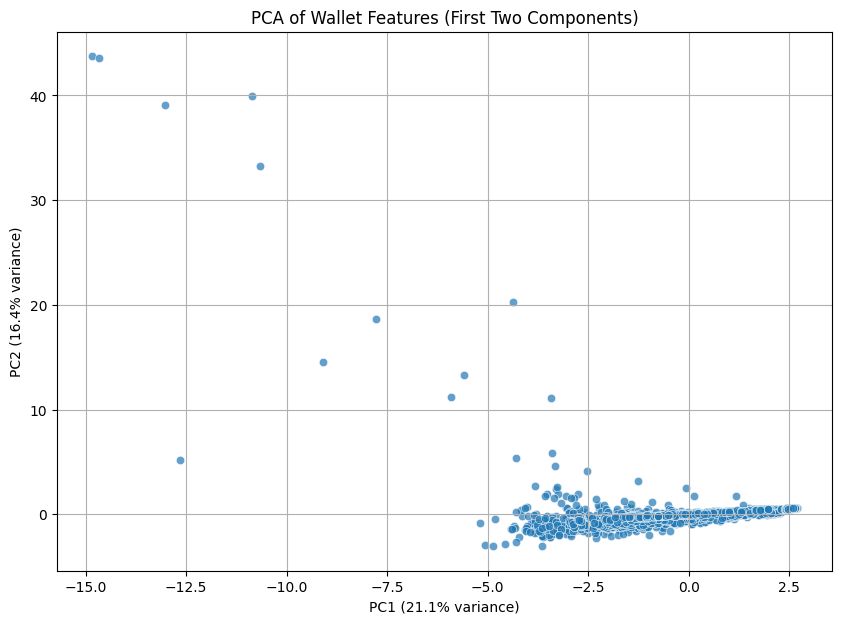


Top features for PC1:
deposit_ratio    0.390065
num_assets       0.366091
log_volume       0.349201
active_days      0.344752
borrow_ratio     0.312157
Name: PC1, dtype: float64

Top features for PC2:
volume_per_tx       0.510319
max_tx_usd          0.480755
total_volume_usd    0.448100
median_tx_usd       0.445293
tx_time_std         0.140316
Name: PC2, dtype: float64


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data (exclude non-numeric columns)
X = training_df.drop(columns=['wallet'])  # Keep only numeric features

# 2. Standardize the data (critical for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
principal_components = pca.fit_transform(X_scaled)

# 4. Create DataFrame with principal components
pca_df = pd.DataFrame(
    data=principal_components,
    columns=[f'PC{i+1}' for i in range(principal_components.shape[1])]
)
pca_df['wallet'] = training_df['wallet'].values  # Add wallet addresses back

# 5. Analyze results
print("\nPCA Results:")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2%}")
print(f"Original dimensions: {X_scaled.shape[1]}")
print(f"Reduced dimensions: {pca.n_components_}")

# 6. Visualize the first two components
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1',
    y='PC2',
    data=pca_df,
    alpha=0.7,
    palette='viridis'
)
plt.title('PCA of Wallet Features (First Two Components)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.grid()
plt.show()

# 7. Feature loadings analysis
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=X.columns
)

print("\nTop features for PC1:")
print(loadings['PC1'].abs().sort_values(ascending=False).head(5))

print("\nTop features for PC2:")
print(loadings['PC2'].abs().sort_values(ascending=False).head(5))

# 8. Optional: Add cluster labels if you've done clustering
# pca_df['cluster'] = cluster_labels

In [177]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
pca_df['cluster'] = kmeans.fit_predict(principal_components)

In [178]:
pca_df['cluster']

,cluster
0,1
1,1
2,1
3,0
4,3
...,...
3492,3
3493,0
3494,0
3495,0


In [179]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,wallet,cluster
0,-3.263222,2.477372,0.345714,0.156561,-1.063148,2.054675,-0.736149,-1.169630,-2.821147,-0.703084,-0.500063,-0.318015,0.324348,0x02491d37984764d39b99e4077649dcd349221a62,1
1,-3.836075,-0.929635,1.312685,2.210182,-0.457551,2.618748,1.146889,-1.736757,-0.056189,-0.974160,-1.611437,-0.873512,0.522962,0x005f16f017aa933bb41965b52848ceb8ee48b171,1
2,-1.904418,-0.350458,0.672284,-0.218841,0.559956,0.559518,0.466975,-0.687954,-0.215883,-0.653454,0.072680,0.036427,0.259017,0x0524849b35de1273b41918ce5c0f5b260a4bd033,1
3,1.252885,-0.060404,-1.492702,0.172321,-0.799455,0.320183,0.210008,-0.384029,0.169363,0.140091,0.795908,-1.024776,-0.837433,0x037e2847c769d20564502183f524f88baa06b389,0
4,-0.839655,-0.144594,1.968676,-1.182951,-0.632300,-0.756952,1.548611,-0.203452,-0.208098,-0.703125,0.294571,-0.313224,0.007175,0x00fea8ef6f337ce6aa8b5bb7086ace94dd0434a7,3


In [180]:
import plotly.express as px
fig = px.scatter_3d(
    pca_df,
    x='PC1',
    y='PC2',
    z='PC3',
    hover_name='wallet',
    color='cluster'  # If you added clusters
)
fig.show()

In [13]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,wallet
0,-3.295872,2.458649,0.351645,0.173824,-0.977299,2.222781,-0.878036,-0.982555,-2.816015,-0.626621,-0.439016,-0.275367,0.313831,0x02491d37984764d39b99e4077649dcd349221a62
1,-3.858818,-0.953982,1.321198,2.226479,-0.374342,2.805768,0.945670,-1.691657,-0.056084,-0.959699,-1.549644,-0.789679,0.500386,0x005f16f017aa933bb41965b52848ceb8ee48b171
2,-1.919876,-0.364302,0.675920,-0.212217,0.586970,0.626221,0.374797,-0.714597,-0.216096,-0.625436,0.107591,0.047287,0.256916,0x0524849b35de1273b41918ce5c0f5b260a4bd033
3,1.251601,-0.053591,-1.491044,0.177430,-0.780597,0.360976,0.150542,-0.410698,0.177719,0.155040,0.765985,-1.039372,-0.845266,0x037e2847c769d20564502183f524f88baa06b389
4,-0.848555,-0.152295,1.967643,-1.191000,-0.647128,-0.726414,1.459966,-0.545962,-0.222170,-0.706488,0.294033,-0.321019,0.004625,0x00fea8ef6f337ce6aa8b5bb7086ace94dd0434a7


In [34]:
from sklearn.cluster import KMeans

# Apply KMeans clustering (choose number of clusters, e.g., 5)
kmeans = KMeans(n_clusters=10, random_state=42)
pca_df['cluster'] = kmeans.fit_predict(pca_df.drop(columns=['wallet']))


In [35]:
# Optional: View how many wallets are in each cluster
cluster_counts = pca_df['cluster'].value_counts()
print(cluster_counts)


cluster
6    757
8    471
3    467
0    396
9    305
1    304
2    297
5    286
4    138
7     76
Name: count, dtype: int64


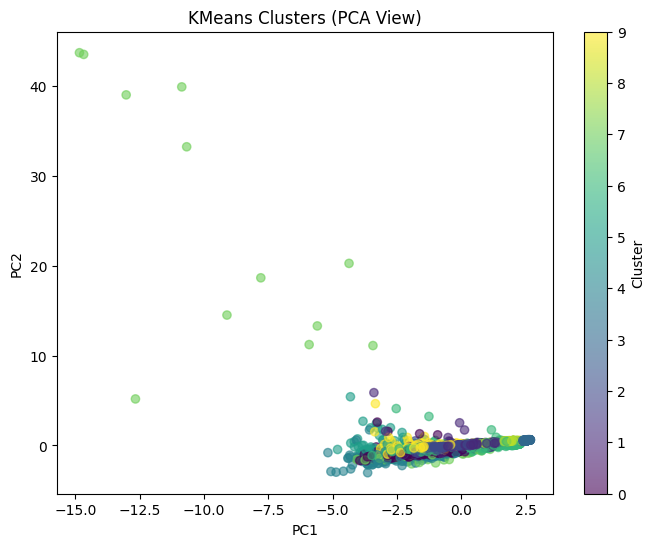

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis', alpha=0.6)
plt.title('KMeans Clusters (PCA View)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()


In [37]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,wallet,cluster,credit_score
0,-3.295872,2.458649,0.351645,0.173824,-0.977299,2.222781,-0.878036,-0.982555,-2.816015,-0.626621,-0.439016,-0.275367,0.313831,0x02491d37984764d39b99e4077649dcd349221a62,5,300
1,-3.858818,-0.953982,1.321198,2.226479,-0.374342,2.805768,0.945670,-1.691657,-0.056084,-0.959699,-1.549644,-0.789679,0.500386,0x005f16f017aa933bb41965b52848ceb8ee48b171,5,300
2,-1.919876,-0.364302,0.675920,-0.212217,0.586970,0.626221,0.374797,-0.714597,-0.216096,-0.625436,0.107591,0.047287,0.256916,0x0524849b35de1273b41918ce5c0f5b260a4bd033,6,400
3,1.251601,-0.053591,-1.491044,0.177430,-0.780597,0.360976,0.150542,-0.410698,0.177719,0.155040,0.765985,-1.039372,-0.845266,0x037e2847c769d20564502183f524f88baa06b389,6,350
4,-0.848555,-0.152295,1.967643,-1.191000,-0.647128,-0.726414,1.459966,-0.545962,-0.222170,-0.706488,0.294033,-0.321019,0.004625,0x00fea8ef6f337ce6aa8b5bb7086ace94dd0434a7,2,250


In [38]:
import pandas as pd
import numpy as np

# df is your PCA+cluster dataframe
cluster_counts = pca_df['cluster'].value_counts().sort_values()  # small clusters = better
ranked_clusters = {cluster: rank for rank, cluster in enumerate(cluster_counts.index, start=1)}


In [39]:
ranked_clusters

{7: 1, 4: 2, 5: 3, 2: 4, 1: 5, 9: 6, 0: 7, 3: 8, 8: 9, 6: 10}

In [40]:
# Rank 1 (best cluster) gets 1000, worst gets 50 (linear mapping)
score_mapping = {}
for cluster, rank in ranked_clusters.items():
    score = int(np.linspace(1000, 50, len(ranked_clusters))[rank - 1])
    score_mapping[cluster] = score


In [41]:
pca_df['credit_score'] = pca_df['cluster'].map(score_mapping)


In [42]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,wallet,cluster,credit_score
0,-3.295872,2.458649,0.351645,0.173824,-0.977299,2.222781,-0.878036,-0.982555,-2.816015,-0.626621,-0.439016,-0.275367,0.313831,0x02491d37984764d39b99e4077649dcd349221a62,5,788
1,-3.858818,-0.953982,1.321198,2.226479,-0.374342,2.805768,0.945670,-1.691657,-0.056084,-0.959699,-1.549644,-0.789679,0.500386,0x005f16f017aa933bb41965b52848ceb8ee48b171,5,788
2,-1.919876,-0.364302,0.675920,-0.212217,0.586970,0.626221,0.374797,-0.714597,-0.216096,-0.625436,0.107591,0.047287,0.256916,0x0524849b35de1273b41918ce5c0f5b260a4bd033,6,50
3,1.251601,-0.053591,-1.491044,0.177430,-0.780597,0.360976,0.150542,-0.410698,0.177719,0.155040,0.765985,-1.039372,-0.845266,0x037e2847c769d20564502183f524f88baa06b389,6,50
4,-0.848555,-0.152295,1.967643,-1.191000,-0.647128,-0.726414,1.459966,-0.545962,-0.222170,-0.706488,0.294033,-0.321019,0.004625,0x00fea8ef6f337ce6aa8b5bb7086ace94dd0434a7,2,683


In [43]:
pca_df[['wallet', 'cluster', 'credit_score']].head()


,wallet,cluster,credit_score
0,0x02491d37984764d39b99e4077649dcd349221a62,5,788
1,0x005f16f017aa933bb41965b52848ceb8ee48b171,5,788
2,0x0524849b35de1273b41918ce5c0f5b260a4bd033,6,50
3,0x037e2847c769d20564502183f524f88baa06b389,6,50
4,0x00fea8ef6f337ce6aa8b5bb7086ace94dd0434a7,2,683


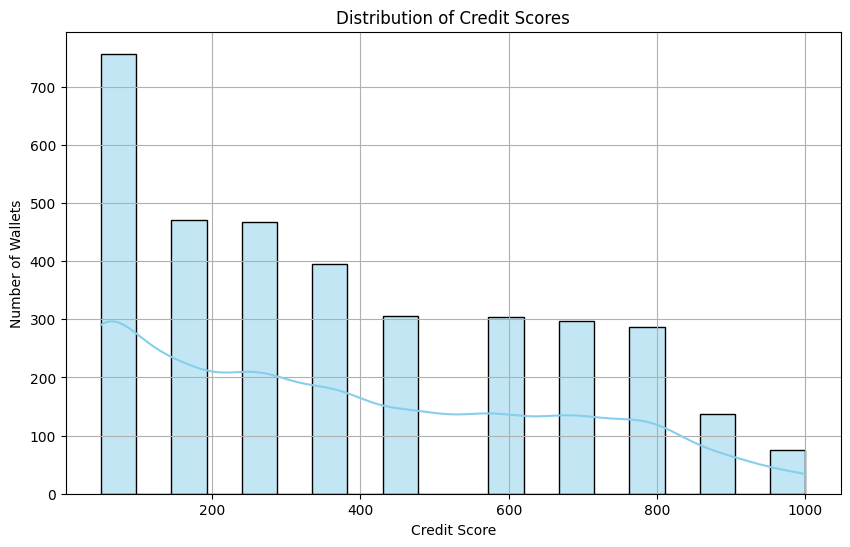

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(pca_df['credit_score'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Credit Scores")
plt.xlabel("Credit Score")
plt.ylabel("Number of Wallets")
plt.grid(True)
plt.show()


/tmp/ipython-input-46-1995152186.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wallet', y='credit_score', data=top_wallets, palette='viridis')


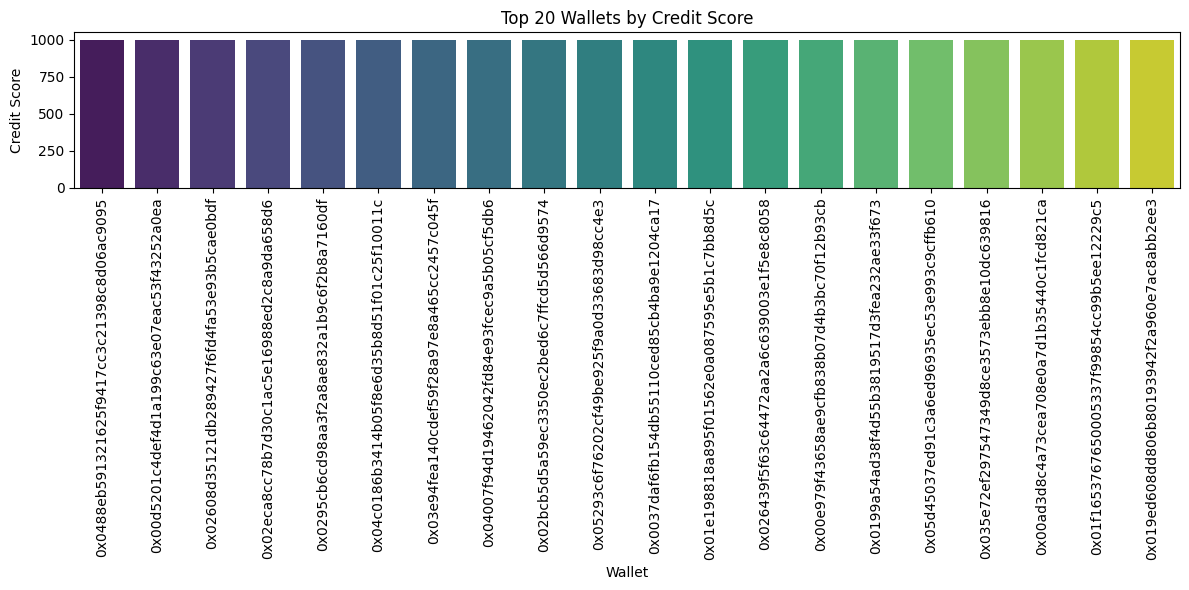

In [46]:
top_wallets = pca_df.sort_values('credit_score', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='wallet', y='credit_score', data=top_wallets, palette='viridis')
plt.xticks(rotation=90)
plt.title("Top 20 Wallets by Credit Score")
plt.xlabel("Wallet")
plt.ylabel("Credit Score")
plt.tight_layout()
plt.show()


/tmp/ipython-input-50-4048602455.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wallet', y='credit_score', data=pca_df, palette='Spectral')


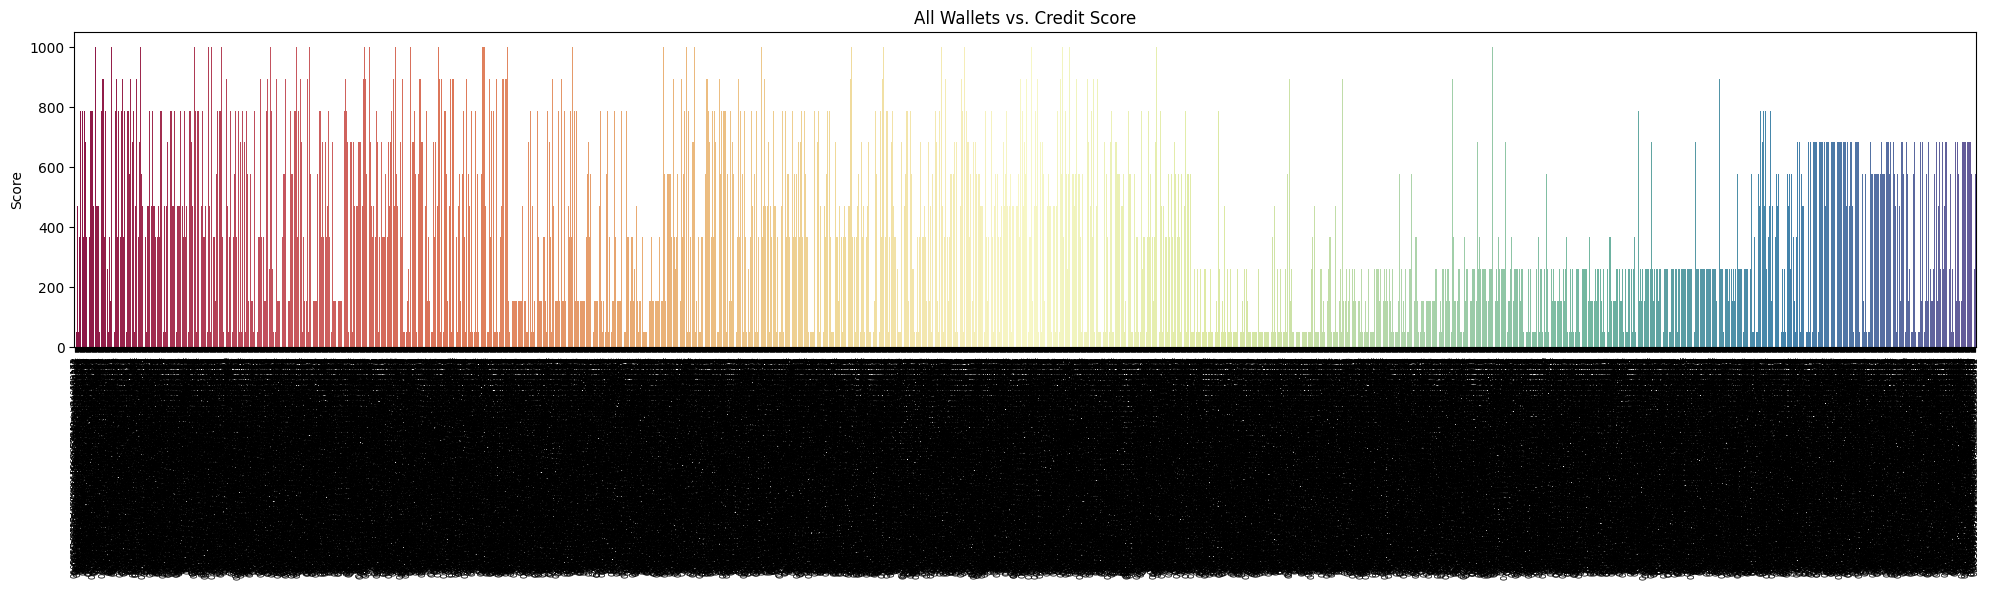

In [50]:
plt.figure(figsize=(20, 6))
sns.barplot(x='wallet', y='credit_score', data=pca_df, palette='Spectral')
plt.xticks(rotation=90, fontsize=6)
plt.title("All Wallets vs. Credit Score")
plt.xlabel("")
plt.ylabel("Score")
plt.tight_layout()
plt.show()


dbscan_cluster
-1      371
 0     2446
 1      494
 2        7
 3       11
 4       16
 5        7
 6        6
 7        6
 8        4
 9        9
 10       5
 11       5
 12     110
Name: count, dtype: int64


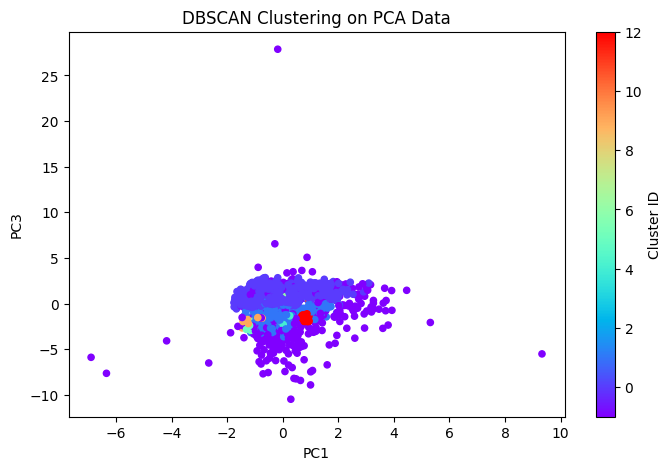

In [58]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select only PCA components (excluding wallet/cluster/score)
pca_features = pca_df.drop(columns=['wallet','cluster','credit_score'], errors='ignore')

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_features)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Tune eps and min_samples as needed
pca_df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Count clusters and noise
print(pca_df['dbscan_cluster'].value_counts().sort_index())

# Visualize DBSCAN clusters (using first 2 PCs)
plt.figure(figsize=(8, 5))
plt.scatter(
    pca_df['PC10'], pca_df['PC3'],
    c=pca_df['dbscan_cluster'], cmap='rainbow', s=20
)
plt.title("DBSCAN Clustering on PCA Data")
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.colorbar(label='Cluster ID')
plt.show()


In [59]:
import pandas as pd

# Get cluster sizes (excluding noise cluster -1)
cluster_sizes = pca_df[pca_df['dbscan_cluster'] != -1]['dbscan_cluster'].value_counts()

# Sort clusters by size (larger cluster = higher score)
sorted_clusters = cluster_sizes.sort_values(ascending=False).index.tolist()

# Map each cluster to a score: higher for larger clusters
cluster_score_map = {cluster: int(1000 * (1 - rank / (len(sorted_clusters)-1)))
                     for rank, cluster in enumerate(sorted_clusters)}

# Noise cluster gets a low score (e.g., 0)
cluster_score_map[-1] = 0

# Assign scores
pca_df['score'] = pca_df['dbscan_cluster'].map(cluster_score_map)


In [65]:
scores = pca_df[['wallet', 'credit_score']]


In [66]:
scores

,wallet,credit_score
0,0x02491d37984764d39b99e4077649dcd349221a62,788
1,0x005f16f017aa933bb41965b52848ceb8ee48b171,788
2,0x0524849b35de1273b41918ce5c0f5b260a4bd033,50
3,0x037e2847c769d20564502183f524f88baa06b389,50
4,0x00fea8ef6f337ce6aa8b5bb7086ace94dd0434a7,683
...,...,...
3492,0x054a164d91efa1cf07c2f682d2c9d618c9076f85,683
3493,0x04d25fb9b9ab1c310a20c74012f31a98d8a3fb60,155
3494,0x043bd8f57401e46a5da19545ffb50370202cc179,261
3495,0x0056323f02bb16de8025a79ab09e1dd5c8114602,577


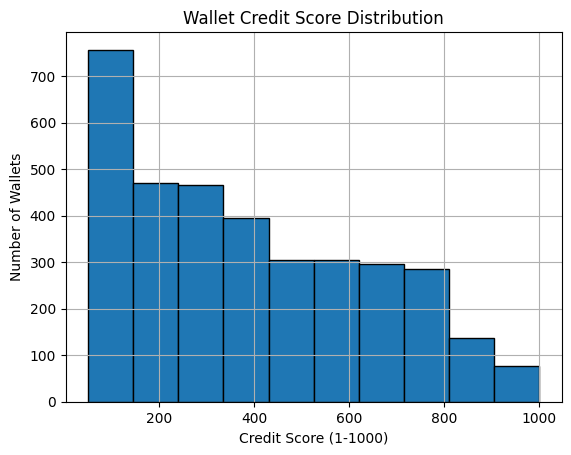

In [68]:
import matplotlib.pyplot as plt
plt.hist(scores['credit_score'], bins=10, edgecolor='black')
plt.title('Wallet Credit Score Distribution')
plt.xlabel('Credit Score (1-1000)')
plt.ylabel('Number of Wallets')
plt.grid(True)
plt.show()